# Greenhouse Gases Data Visualization with Matplotlib

The dataset was created using NOAA - Global Monitoring Laboratory's studies on greenhouse gases (CO2,N2O, CH4, SF6, Reletive Temprature) for near two decade



To get dataset :

https://www.kaggle.com/datasets/hakansaritas/greenhouse-gases

to understand how to combine separete (txt and csv) datasets - (Create_Dataset.ipynb):

https://github.com/hakansaritas/Create-greenhouse-gases-dataset-and-visualize

the dataset is about monthly measuring the atmospheric distribution and trends of the main long-term drivers of climate change, carbon dioxide (CO2), methane (CH4), and nitrous oxide (N2O), as well as Sulfur hexafluoride (SF6).

**relative_temp** :  relative temperature values according to reference temperature

**CO2**: Data are reported as a dry air mole fraction defined as the number of molecules of carbon dioxide divided by the number of all molecules in air, including CO2 itself, after water vapor has been removed. The mole fraction is expressed as parts per million (ppm). Example: 0.000400 is expressed as 400 ppm.

**CH4**: Methane is reported as a “dry air mole fraction”, defined as the number of molecules of methane divided by the total number of molecules in the sample, after water vapor has been removed. The mole fraction is expressed as nmol mol-1, abbreviated “ppb” (for parts per billion; 1 ppb indicates that one out of every billion molecules in an air sample is CH4).

**N2O**: Nitrous oxide is reported as a “dry air mole fraction”, defined as the number of molecules of nitrous oxide divided by the total number of molecules in the sample, after water vapor has been removed. The mole fraction is expressed as nmol mol-1, abbreviated “ppb” (for parts per billion; 1 ppb indicates that one out of every billion molecules in an air sample is N2O).

**SF6**: Sulfur hexafluoride is reported as a “dry air mole fraction”, defined as the number of molecules of sulfur hexafluoride divided by the total number of molecules in the sample, after water vapor has been removed. The mole fraction is expressed as pmol mol-1, abbreviated “ppt” (for parts per trillion; 1 ppt indicates that one out of every trillion molecules in an air sample is SF6).

For More Detail about data:
https://gml.noaa.gov/ccgg/

https://www.ncei.noaa.gov/access/monitoring/global-temperature-anomalies/

In [1]:
# Importing course packages; you can add more too!
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_ = pd.read_csv('greenhouse_gases.csv', parse_dates=["date"], index_col="date")

In [3]:
df = df_.copy()

In [4]:
df.head()

,relative_temp,co2,ch4,n2o,sf6,relative_co2,relative_ch4,relative_n2o,relative_sf6
date,,,,,,,,,
2001-01-01,0.47,370.68,1772.86,316.30,4.69,0.50,-0.36,0.01,0.02
2001-02-01,0.41,371.18,1772.50,316.31,4.71,0.50,-0.36,0.01,0.02
2001-03-01,0.65,371.59,1773.63,316.21,4.73,0.41,1.13,-0.10,0.02
2001-04-01,0.59,371.90,1773.84,316.12,4.75,0.31,0.21,-0.09,0.02
2001-05-01,0.62,371.80,1770.73,316.11,4.76,-0.10,-3.11,-0.01,0.01


------------------

### Observation of Dataframe 

In [5]:
def get_info(dataframe):
    
    print("----- shape -----")
    print("shape: ",dataframe.shape)
    
    print("-----null -----")
    print(dataframe.isnull().sum())
    
    print("------info----------")
    print(dataframe.info())
    
    print("------num cols------------")
    num_cols = dataframe.select_dtypes(include="number").columns
    print(num_cols.values)
    
    print("------categoric cols------------")
    cat_cols = dataframe.select_dtypes(include="object").columns
    print(cat_cols.values)
 

In [6]:
get_info(df)

----- shape -----
shape:  (257, 9)
-----null -----
relative_temp    0
co2              0
ch4              0
n2o              0
sf6              0
relative_co2     0
relative_ch4     0
relative_n2o     0
relative_sf6     0
dtype: int64
------info----------
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 257 entries, 2001-01-01 to 2022-05-01
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   relative_temp  257 non-null    float64
 1   co2            257 non-null    float64
 2   ch4            257 non-null    float64
 3   n2o            257 non-null    float64
 4   sf6            257 non-null    float64
 5   relative_co2   257 non-null    float64
 6   relative_ch4   257 non-null    float64
 7   relative_n2o   257 non-null    float64
 8   relative_sf6   257 non-null    float64
dtypes: float64(9)
memory usage: 20.1 KB
None
------num cols------------
['relative_temp' 'co2' 'ch4' 'n2o' 'sf6' 'relative_co2' 'relativ

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
relative_temp,257.0,0.727821,0.171101,0.27,0.60,0.70,0.84,1.31
co2,257.0,392.288482,13.736555,368.32,380.53,391.13,404.16,418.52
ch4,257.0,1815.282646,40.181021,1762.73,1779.58,1803.60,1847.20,1909.97
n2o,257.0,324.722918,5.643241,316.11,319.70,324.24,329.46,335.47
sf6,257.0,7.530584,1.842827,4.69,5.89,7.33,9.10,10.99
relative_co2,257.0,0.188093,0.952973,-1.95,-0.15,0.41,0.78,1.75
relative_ch4,257.0,0.527315,3.223568,-5.71,-1.76,-0.04,2.55,10.03
relative_n2o,257.0,0.074630,0.085105,-0.17,0.01,0.07,0.14,0.28
relative_sf6,257.0,0.024591,0.009557,0.00,0.02,0.02,0.03,0.05


-------------------------

# 1- Line Plot

-------------------

## A - plt

### Graph via Basic plt commands

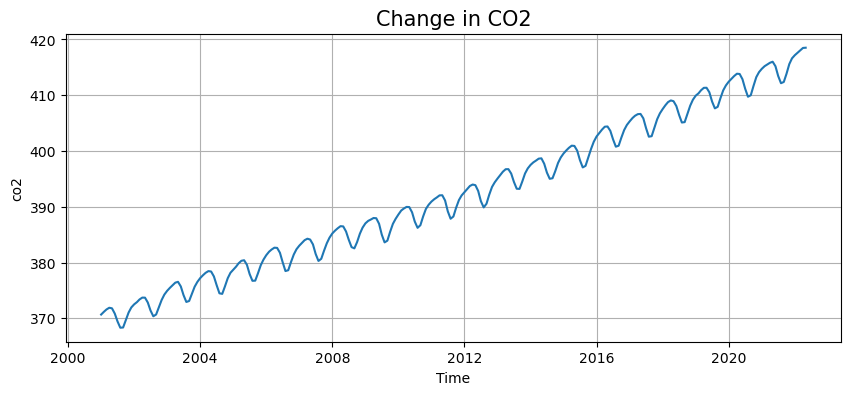

In [8]:
plt.figure(figsize =(10,4))

plt.plot(df.index, df["co2"])

plt.xlabel("Time")

plt.ylabel("co2")

plt.title("Change in CO2",  size = 15)

plt.grid()

plt.show()

-----------------

### Detailed plt commands

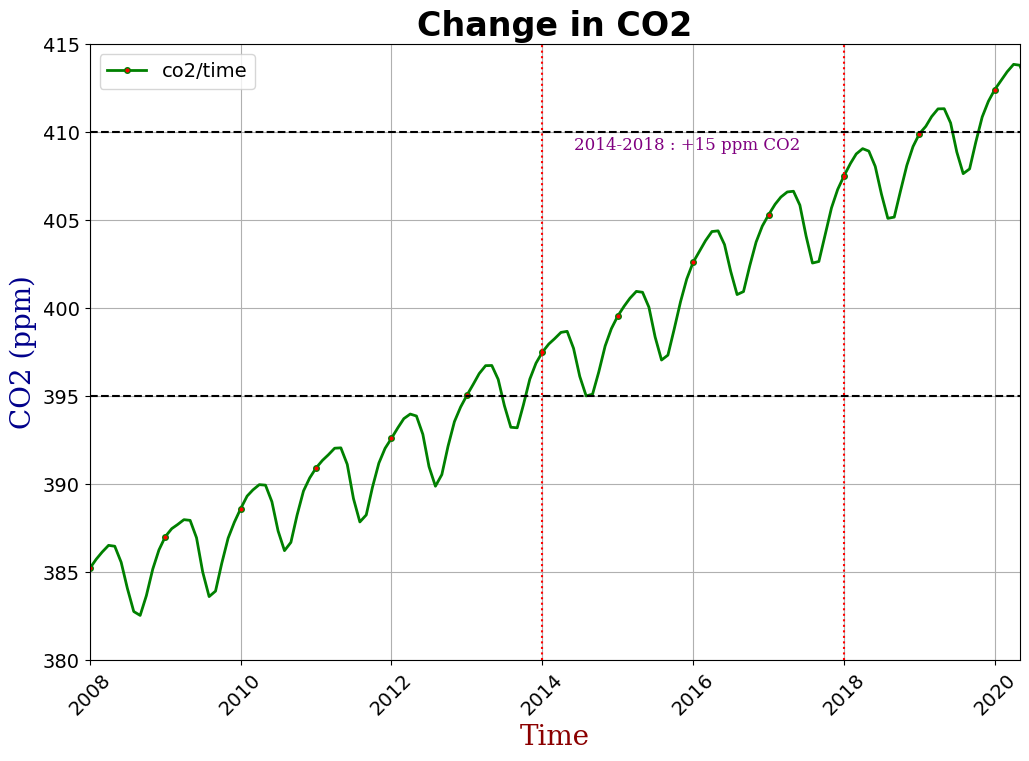

In [9]:
# CO2 changing in Time

# figsize 
plt.figure(figsize =(12,8))

# plot
plt.plot(df.index,df["co2"], 
         linestyle="-", linewidth=2, color = "green",
         marker = ".", markersize = 8,  markerfacecolor = "red", markevery = 12,
        label = "co2/time")

# font dictionary to use in label adjustment
font = {'family': 'serif',
        'color':  'darkred',
        'weight': 'normal',
        'size': 20,
        }
# axes labels
plt.xlabel("Time", fontdict = font)
plt.ylabel("CO2 (ppm)", fontdict = font, color ="darkblue")

# axec ticks
plt.xticks(rotation=45, size = 14)
plt.yticks(size = 14)

# dashed horizontal lines
plt.axhline(y=395, color="black", linestyle="--")
plt.axhline(y=410, color="black", linestyle="--")

# dashed vertical lines
plt.axvline(x=pd.Timestamp("2014"), color="red", linestyle=":")
plt.axvline(x=pd.Timestamp("2018"), color="red", linestyle=":")

# main title
plt.title("Change in CO2", size = 24, weight="bold")

# text in graph with its location
plt.text(pd.Timestamp("2014-06"),409, '2014-2018 : +15 ppm CO2', color = "purple", size = 12, family = "serif" )

# grid
plt.grid()

# legend, to show legend you need to describe "label"  in plt.plot()
plt.legend(fontsize=14)

# axes limits to show
plt.xlim(pd.Timestamp("2008-01"),pd.Timestamp("2020-05"))
plt.ylim(380,415)

plt.show()

----------------

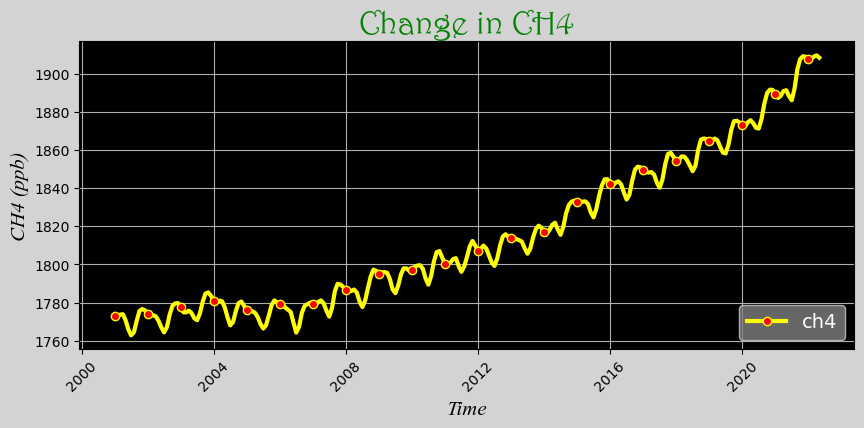

In [10]:
# CH4 Chnaging in Time

plt.figure(figsize = (10,4), facecolor="lightgrey")

# background color
plt.rcParams['axes.facecolor'] = 'black'

# plot CH4
plt.plot(df.index,df["ch4"], 
         linestyle="-", linewidth=3, color = "yellow", 
         marker = ".", markersize = 12, markerfacecolor = "red", markevery = 12,
         label = "ch4")

# axes labels
plt.xlabel("Time", font = "Times New Roman", style = "italic", size = 15)
plt.ylabel("CH4 (ppb)", font = "Times New Roman", style = "italic", size = 15)

# axes ticks 
plt.xticks(rotation = 45, size = 10)
plt.yticks(size = 10)

# graph title
plt.title("Change in CH4", font = "Harrington", size = 24, color = "g")

# put grid
plt.grid()

# put legend, to show legend you need to describe "label"  in plt.plot()
plt.legend(fontsize=14, loc ="lower right",  facecolor = "grey", fancybox =True, labelcolor = "w")

plt.show()

------------------

## a function for basic plt

In [11]:
def plt_graph(x, y, figsize= (10,4), x_label = "", y_label ="", title="",title_size = 20, label_size=15, color = "black", grid = True, legend = True):
    
    plt.style.use('default')
    
    plt.figure(figsize = figsize)

    plt.plot(x, y , color = color, label = y.name)

    plt.xlabel(x_label, size= label_size)

    plt.ylabel(y_label, size = label_size)

    plt.title(title, size = title_size)
    
    if legend:
    
        plt.legend()
    
    if grid:
        
        plt.grid()

    plt.show()

-------------

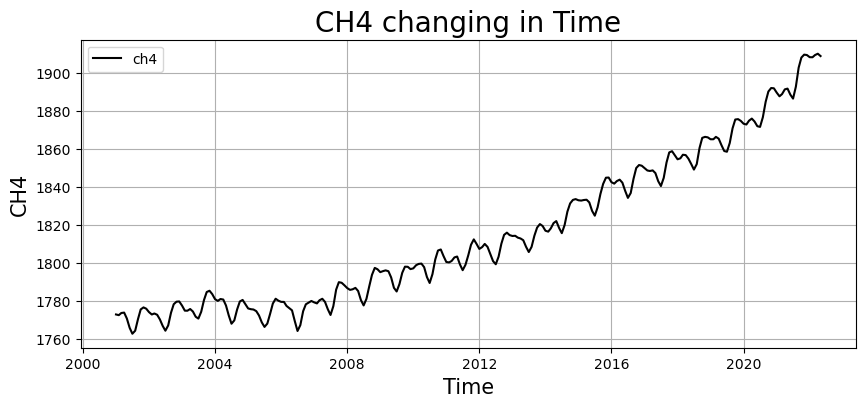

In [12]:
plt_graph(df.index, df.ch4, x_label = "Time", y_label="CH4", title = "CH4 changing in Time")

------------------

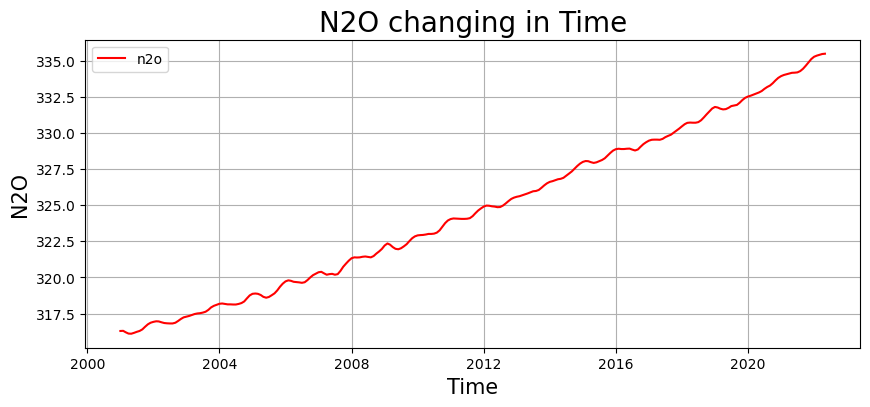

In [13]:
plt_graph(df.index, df.n2o, x_label = "Time", y_label="N2O", title = "N2O changing in Time",color ="r")

-----------------

## B - fig, ax

### Graph via simple commands

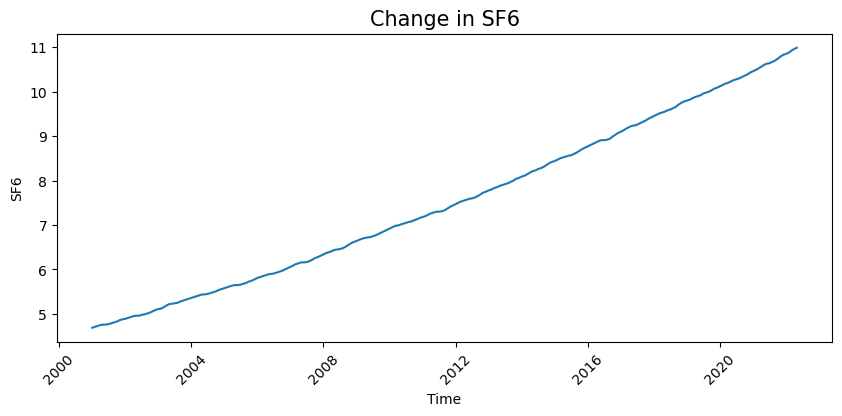

In [14]:
fig, ax = plt.subplots(figsize=(10,4))

ax.plot(df.index, df["sf6"])

ax.set_xlabel("Time")

ax.set_ylabel("SF6")

ax.set_title("Change in SF6", size = 15)

plt.xticks(rotation=45)

plt.show()

-------------

### Two Variables in a graph

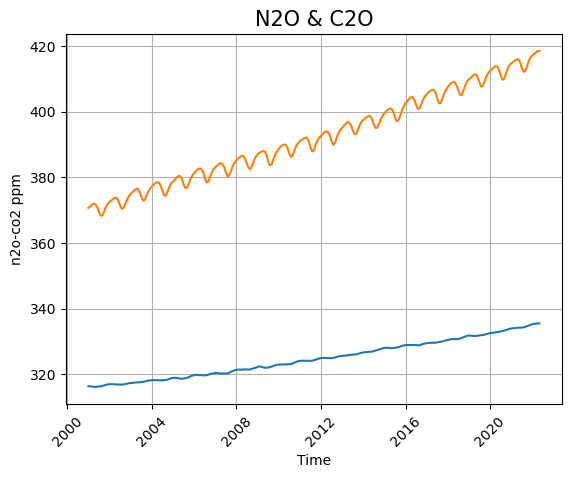

In [15]:
fig, ax = plt.subplots()

ax.plot(df.index, df["n2o"])
ax.plot(df.index, df["co2"])

ax.set_xlabel("Time")

ax.set_ylabel("n2o-co2 ppm")

ax.set_title("N2O & C2O", size = 15)

plt.xticks(rotation=45)
plt.grid()

plt.show()

--------------------

### Graphs side by side

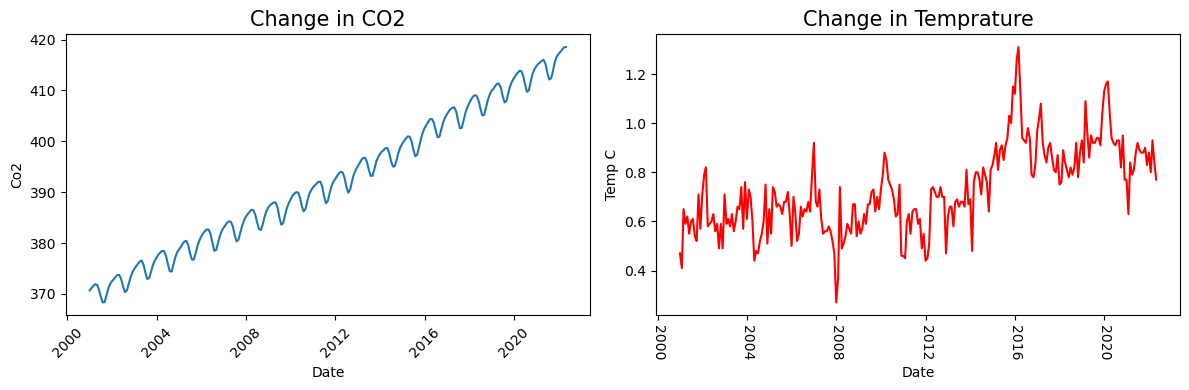

In [16]:
# 1 row, 2 columns
fig, ax = plt.subplots(1,2, figsize =(12,4))

# first graph
ax[0].plot(df.index, df["co2"])
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Co2")
ax[0].set_title("Change in CO2", size = 15)
ax[0].tick_params(axis='x', rotation=45)

# second graph
ax[1].plot(df.index, df["relative_temp"], color = "r")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Temp C")
ax[1].set_title("Change in Temprature", size = 15)
ax[1].tick_params(axis='x', rotation = 270)

# tight the graphs
plt.tight_layout()

plt.show()

----------------------

### Graphs one after the other

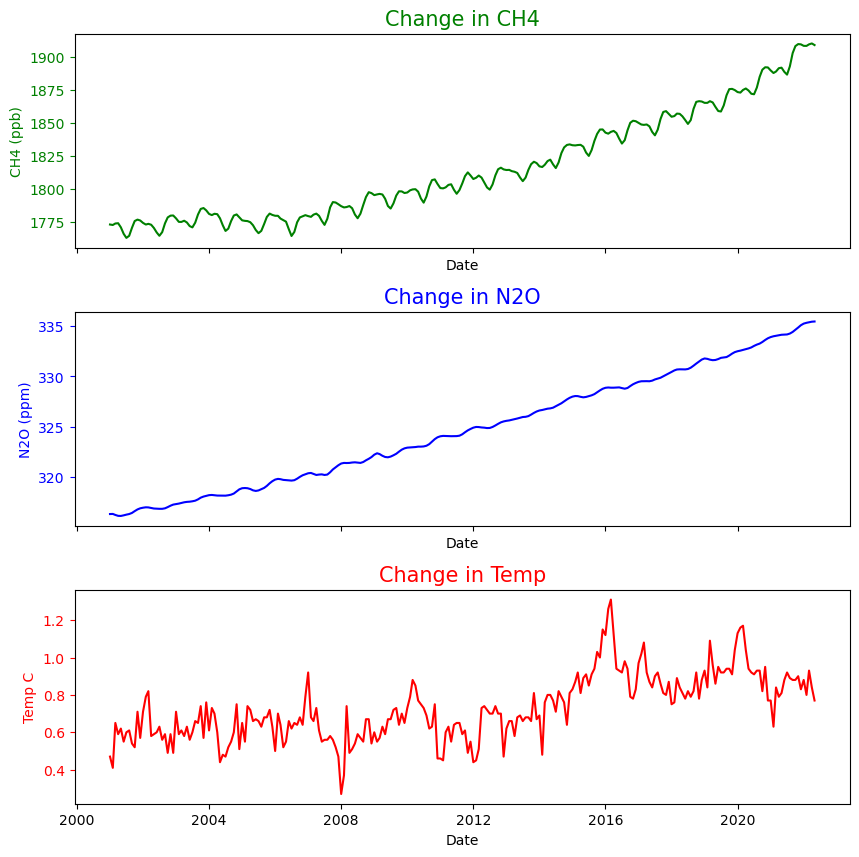

In [17]:
# 3 rows, 1 column, shared x axes 
fig, ax = plt.subplots(3,1, figsize = (10,10), sharex = True)
fig.subplots_adjust(wspace=0.1, hspace=0.3)

# first graph
ax[0].plot(df.index, df["ch4"], color ="g")
ax[0].set_xlabel("Date")
ax[0].set_ylabel("CH4 (ppb)", color="g")
ax[0].set_title("Change in CH4", size = 15, color="g")
ax[0].tick_params("y", colors="g")

# second graph
ax[1].plot(df.index, df["n2o"], color = "b")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("N2O (ppm)", color="b")
ax[1].set_title("Change in N2O", size = 15, color="b")
ax[1].tick_params("y", colors="b")

# third graph
ax[2].plot(df.index, df["relative_temp"], color = "red")
ax[2].set_xlabel("Date")
ax[2].set_ylabel("Temp C", color ="r")
ax[2].set_title("Change in Temp", size = 15, color = "r")
ax[2].tick_params("y", colors="r")

plt.show()

-----------

### two variables with their own axes in one graph

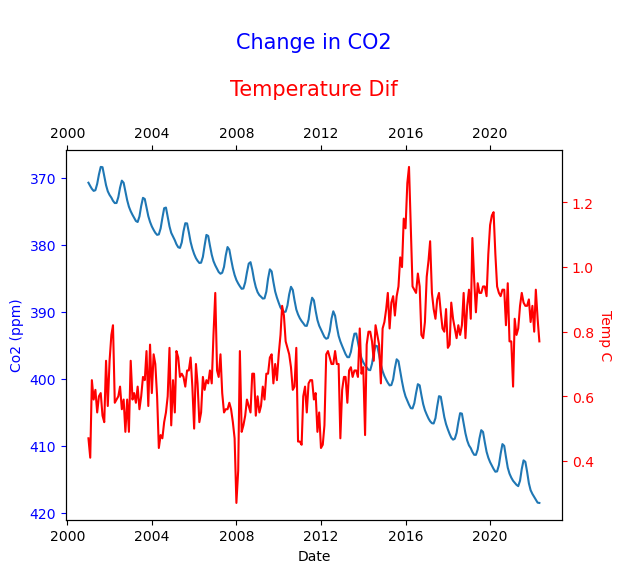

In [18]:
fig, ax = plt.subplots()

# Co2
ax.plot(df.index, df["co2"])
ax.set_xlabel("Date")
ax.set_ylabel("Co2 (ppm)", color="b")
ax.set_title("\nChange in CO2\n\n\n", size = 15, color="b")
ax.tick_params("y", colors="b")

#invert y axis (from big to small)
ax.invert_yaxis() 

# tick on the top and bottom
ax.tick_params(labelbottom=True,labeltop=True) 
ax.xaxis.set_ticks_position("both") 

# make double axes
ax2 = ax.twinx()

# Temperature
ax2.plot(df.index, df["relative_temp"], color = "red")
ax2.set_xlabel("Date")
ax2.set_ylabel("Temp C", rotation=270,color ="r")
ax2.set_title("Temperature Dif\n", size = 15, color = "r")
ax2.tick_params("y", colors="r")
ax2.yaxis.set_label_coords(1.1, .5)

plt.xticks(rotation = 45)
plt.show()

-----------------

### 3 subplots  

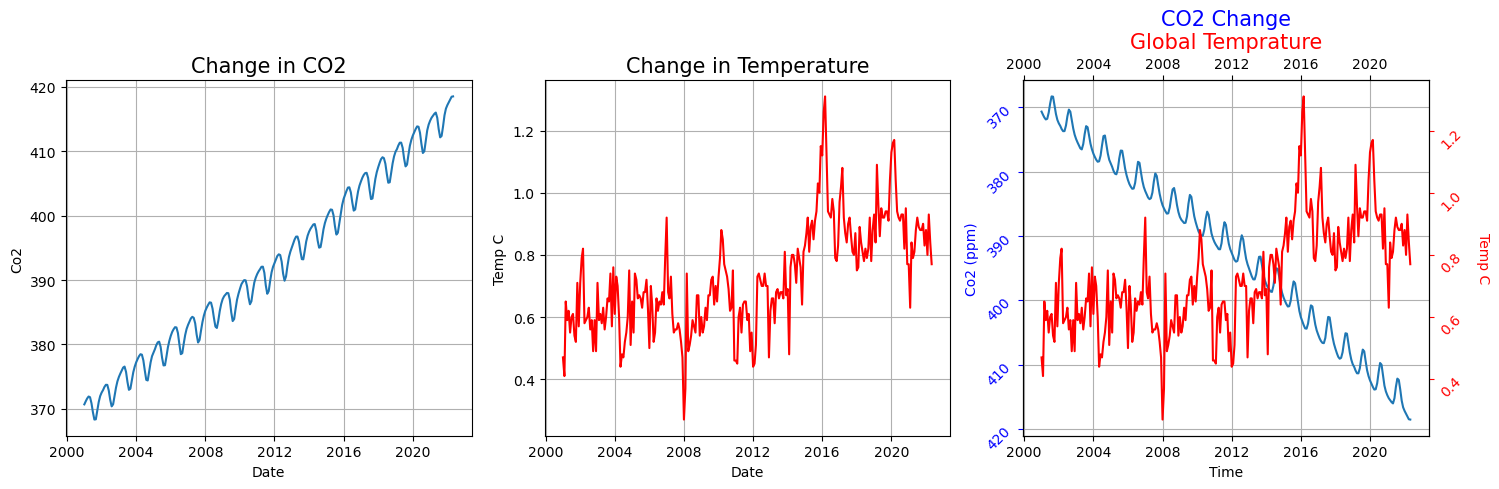

In [19]:
fig, ax = plt.subplots(1,3, figsize=(15,5))

# 1. graph
ax[0].plot(df.index, df["co2"])
ax[0].set_xlabel("Date")
ax[0].set_ylabel("Co2")
ax[0].set_title("Change in CO2", size = 15)
ax[0].grid(True)
# -----------------------------------------------------
# 2. graph
ax[1].plot(df.index, df["relative_temp"], color = "r")
ax[1].set_xlabel("Date")
ax[1].set_ylabel("Temp C")
ax[1].set_title("Change in Temperature", size = 15)
ax[1].grid(True)
# -----------------------------------------------------

# 3. graph
ax[2].plot(df.index, df["co2"])
ax[2].set_xlabel("Time")
ax[2].set_ylabel("Co2 (ppm)", color="b")
ax[2].set_title("CO2 Change\n", size = 15, color="b")
ax[2].tick_params("y", colors="b",rotation=45)
ax[2].grid(True)


ax[2].invert_yaxis() 

ax[2].tick_params(labelbottom=True,labeltop=True) 
ax[2].xaxis.set_ticks_position("both") 


ax3 = ax[2].twinx()

ax3.plot(df.index, df["relative_temp"], color = "red")
ax3.set_ylabel("Temp C", rotation=270,color ="r")
ax3.set_title("Global Temprature", size = 15, color = "r")
ax3.tick_params("y", colors="r",rotation = 45)
ax3.yaxis.set_label_coords(1.15, .5)
# ------------------------------------------

plt.tight_layout()
plt.show();

---------------------

### A function for plot line

In [20]:
def plot_line(axes, x, y, title="", title_size=15,  grid=False, invert_axes = False, color ="blue", tick_top = False,
              x_label="", y_label="", y_rotation=0, x_rotation=0,  x_label_color="black", 
              x_tick_color="black", y_label_color="blue", y_tick_color = "blue"):
  
    axes.plot(x, y, color = color)
      
    axes.set_xlabel(x_label, color = x_label_color)
    
    axes.set_ylabel(y_label, color= y_label_color)
    
    
    axes.tick_params("x", colors=x_tick_color, rotation=x_rotation)
    
    axes.tick_params("y", colors=y_tick_color, rotation=y_rotation)
    
    
    axes.set_title(title, size= title_size)
    
    # if you want to grid
    if grid: 
        
        axes.grid()
        
    # if you want to invert y axes   
    if invert_axes:
        
        axes.invert_yaxis() 
        
    # # if you want label on top    
    if tick_top:
        
        axes.tick_params(labelbottom=True, labeltop=True) 
        
        axes.xaxis.set_ticks_position("both") 

------------

### use function

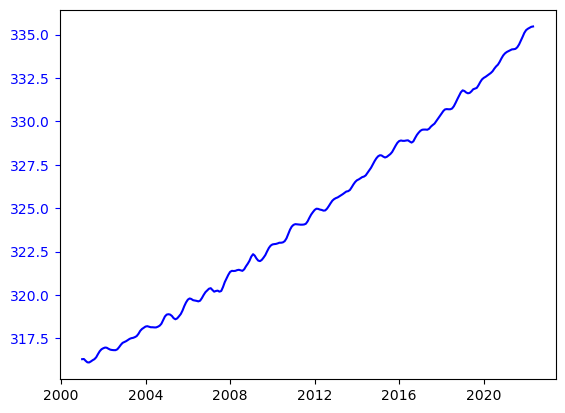

In [21]:
fig, ax = plt.subplots()

plot_line(axes=ax, x = df.index.date, y = df["n2o"])

plt.show();

---------------

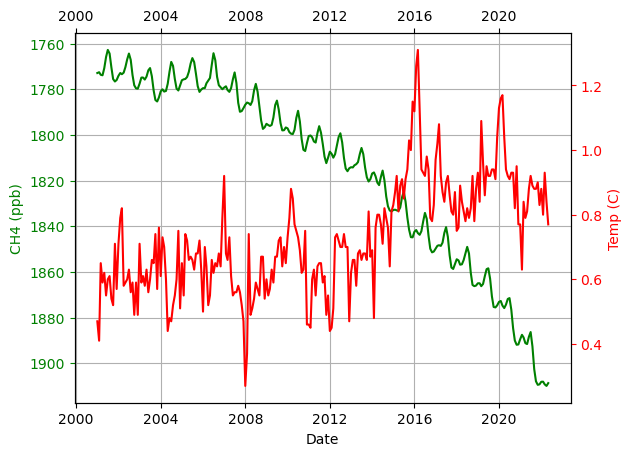

In [22]:
fig, ax = plt.subplots()

plot_line(axes = ax, x = df.index.date, y = df["ch4"], x_label = "Date", y_label="CH4 (ppb)", grid=True,
         color = "g", y_label_color="g", y_tick_color="g", invert_axes =True, tick_top = True)

ax2 = ax.twinx()

plot_line(axes = ax2, x = df.index.date, y = df["relative_temp"], 
          y_label="Temp (C)",color = "r", y_label_color="r", y_tick_color="r")

plt.show()

------------------------

## only 2010 data visualization

In [23]:
df_2010 = df.loc["2010"]
df_2010.head(12)

,relative_temp,co2,ch4,n2o,sf6,relative_co2,relative_ch4,relative_n2o,relative_sf6
date,,,,,,,,,
2010-01-01,0.73,388.62,1797.10,322.91,6.92,0.78,0.39,0.07,0.03
2010-02-01,0.79,389.33,1798.75,322.93,6.95,0.71,1.65,0.02,0.03
2010-03-01,0.88,389.68,1799.43,322.94,6.98,0.35,0.68,0.01,0.03
2010-04-01,0.85,389.98,1799.61,322.97,6.99,0.30,0.18,0.03,0.01
2010-05-01,0.77,389.95,1797.73,323.01,7.01,-0.03,-1.88,0.04,0.02
2010-06-01,0.75,389.01,1792.52,323.01,7.03,-0.94,-5.21,0.00,0.02
2010-07-01,0.73,387.35,1789.41,323.03,7.05,-1.66,-3.11,0.02,0.02
2010-08-01,0.69,386.23,1794.07,323.10,7.07,-1.12,4.66,0.07,0.02
2010-09-01,0.62,386.70,1801.79,323.26,7.08,0.47,7.72,0.16,0.01


-------------

### two variables in one graph 

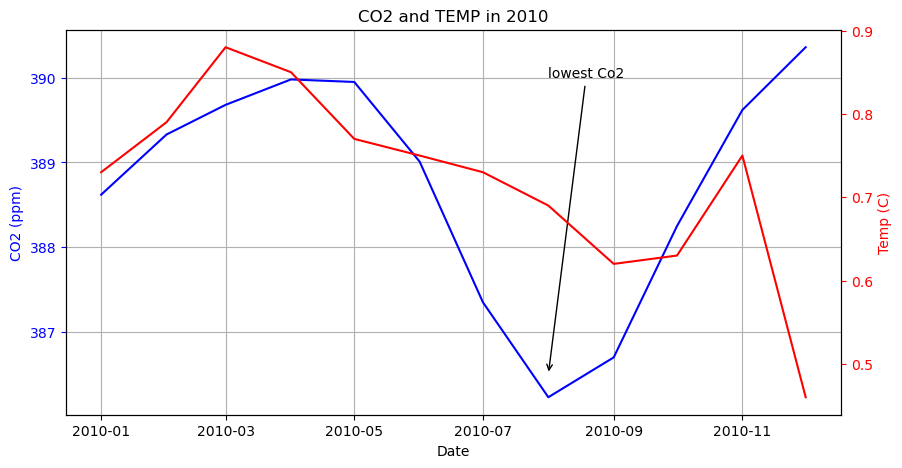

In [24]:
fig, ax = plt.subplots(figsize=(10,5))

plot_line(axes = ax, x = df_2010.index, y = df_2010["co2"], x_label = "Date", y_label="CO2 (ppm)", grid=True)

ax2 = ax.twinx()

plot_line(axes = ax2, x = df_2010.index, y = df_2010["relative_temp"], y_label="Temp (C)",color = "r", 
          y_label_color="r", y_tick_color="r")

ax.annotate("lowest Co2",
            xy = (pd.Timestamp("2010-08"),386.5),
            xytext = (pd.Timestamp("2010-08"), 390),
            arrowprops={"arrowstyle":"->","color":"black"})

plt.title("CO2 and TEMP in 2010")
plt.show()

------------

### Drawing all variables within different axes using "plot_line" function

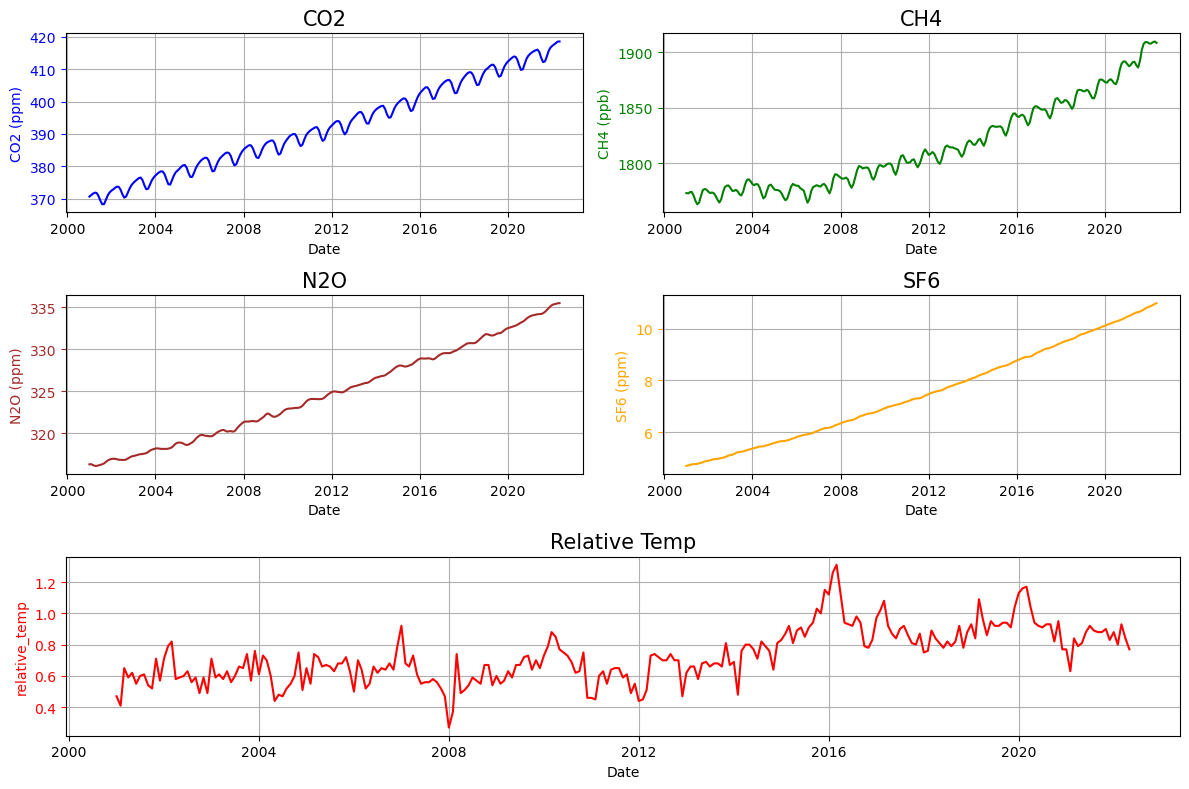

In [25]:
fig,ax = plt.subplots(figsize = (12,8))

ax1 = plt.subplot(321) # 3x2 grid 1. graph
plot_line(axes = ax1, x = df.index.date, y = df["co2"], x_label = "Date", y_label="CO2 (ppm)", grid=True,
         color = "b", y_label_color="b", y_tick_color="b", title = "CO2")

ax2 = plt.subplot(322) # 3x2 grid 2. graph
plot_line(axes = ax2, x = df.index.date, y = df["ch4"], x_label = "Date", y_label="CH4 (ppb)", grid=True,
         color = "g", y_label_color="g", y_tick_color="g",title = "CH4")

ax3 = plt.subplot(323) # 3x2 grid 3. graph
plot_line(axes = ax3, x = df.index.date, y = df["n2o"], x_label = "Date", y_label="N2O (ppm)", grid=True,
         color = "brown", y_label_color="brown", y_tick_color="brown",title = "N2O")

ax4 = plt.subplot(324) # 3x2 grid 4. graph
plot_line(axes = ax4, x = df.index.date, y = df["sf6"], x_label = "Date", y_label="SF6 (ppm)", grid=True,
         color = "orange", y_label_color="orange", y_tick_color="orange",title = "SF6")

ax5 = plt.subplot(313) # 3x1 grid 3. graph
plot_line(axes = ax5, x = df.index.date, y = df["relative_temp"], x_label = "Date", y_label="relative_temp", grid=True,
         color = "red", y_label_color="red", y_tick_color="red",title = "Relative Temp")

plt.tight_layout()

plt.show()

-------------------------

### Groupby as "year"

In [26]:
df_year = df.groupby(df.index.year).agg(["min","mean","max"])

In [27]:
df_year

relative_temp                     co2                          ch4  \
               min      mean   max     min        mean     max      min   
date                                                                      
2001          0.41  0.570000  0.71  368.32  370.571667  371.96  1762.73   
2002          0.49  0.620000  0.82  370.37  372.587500  374.26  1764.32   
2003          0.56  0.638333  0.76  372.94  375.151667  376.55  1770.68   
2004          0.44  0.580000  0.75  374.39  376.951667  378.47  1767.99   
2005          0.55  0.665833  0.74  376.73  378.980833  380.53  1766.31   
2006          0.50  0.632500  0.79  378.48  381.147500  382.67  1764.17   
2007          0.47  0.616667  0.92  380.29  382.900000  384.46  1772.59   
2008          0.27  0.542500  0.74  382.55  385.018333  386.53  1777.61   
2009          0.55  0.643333  0.73  383.62  386.496667  387.99  1784.94   
2010          0.46  0.720833  0.88  386.23  388.756667  390.36  1789.41   
2011          0.45  0.572500  0.65  387.86  390.632500  392.07  1796.14   
2012          0.44  0.633333  0.74  389.89  392.650833  394.39  1799.26   
2013          0.58  0.670833  0.81  393.21  395.399167  396.88  1805.69   
2014          0.48  0.735833  0.82  395.02  397.345000  398.84  1815.61   
2015          0.81  0.925833  1.15  397.06  399.648333  401.66  1824.80   
2016          0.78  0.993333  1.31  400.78  403.061667  404.67  1834.16   
2017          0.80  0.905000  1.08  402.57  405.218333  406.75  1840.39   
2018          0.75  0.820000  0.92  405.11  407.610833  409.19  1849.04   
2019          0.84  0.941667  1.09  407.65  410.072500  411.76  1858.43   
2020          0.77  0.972500  1.17  409.73  412.443333  414.14  1871.49   
2021          0.63  0.835000  0.92  412.16  414.710833  416.62  1886.36   
2022          0.77  0.844000  0.93  417.18  417.974000  418.52  1908.11   

                               n2o  ... relative_co2 relative_ch4            \
             mean      max     min  ...          max          min      mean   
date                                ...                                       
2001  1771.231667  1776.57  316.11  ...         1.35        -4.91  0.223333   
2002  1772.733333  1779.70  316.82  ...         1.33        -3.41  0.316667   
2003  1777.332500  1785.33  317.29  ...         1.28        -2.75  0.322500   
2004  1777.006667  1780.98  318.13  ...         1.47        -5.30 -0.440833   
2005  1774.176667  1781.13  318.60  ...         1.46        -3.64  0.152500   
2006  1774.996667  1779.95  319.63  ...         1.45        -5.71 -0.013333   
2007  1781.472500  1789.84  320.19  ...         1.42        -3.85  0.689167   
2008  1787.085833  1797.34  321.33  ...         1.51        -4.78  0.701667   
2009  1793.569167  1797.99  321.95  ...         1.57        -5.49  0.005833   
2010  1798.960833  1807.03  322.91  ...         1.55        -5.21  0.574167   
2011  1803.160833  1812.34  324.04  ...         1.57        -4.16  0.533333   
2012  1808.105833  1815.88  324.86  ...         1.61        -3.80  0.383333   
2013  1813.453333  1820.39  325.58  ...         1.46        -3.48  0.398333   
2014  1822.741667  1833.52  326.61  ...         1.48        -3.60  1.178333   
2015  1834.359167  1844.86  327.92  ...         1.57        -4.47  0.945000   
2016  1843.186667  1851.44  328.78  ...         1.45        -4.32  0.518333   
2017  1849.726667  1858.71  329.46  ...         1.54        -4.25  0.464167   
2018  1857.420000  1866.25  330.45  ...         1.47        -2.92  0.778333   
2019  1866.670000  1875.57  331.62  ...         1.52        -3.36  0.722500   
2020  1879.102500  1891.93  332.51  ...         1.66        -2.47  1.428333   
2021  1895.456667  1909.49  333.92  ...         1.75        -3.17  1.456667   
2022  1908.850000  1909.97  335.26  ...         0.56        -1.23 -0.108000   

            relative_n2o                 relative_sf6                  
        max          min      mean   max          min      mean   max  
date     

------------------

# 2 - Bar plot

---------------

## A - plt

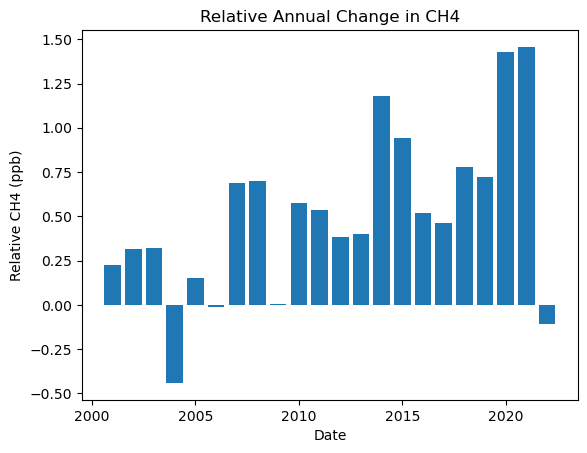

In [28]:
# to reach a variable's mean column, it is needed to write: dataframe["value"]["mean"]
plt.bar(df_year.index, df_year["relative_ch4"]["mean"])

plt.xlabel("Date")

plt.ylabel("Relative CH4 (ppb)")

plt.title("Relative Annual Change in CH4")

plt.show();

-------------

## B - fig, ax

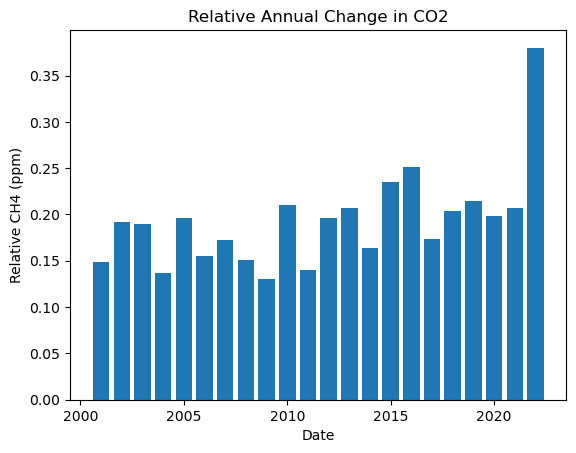

In [29]:
fig, ax = plt.subplots()

ax.bar(df_year.index, df_year["relative_co2"]["mean"])

ax.set_xlabel("Date")

ax.set_ylabel("Relative CH4 (ppm)")

ax.set_title("Relative Annual Change in CO2")

plt.show();

-------------

### Horizontal Bars

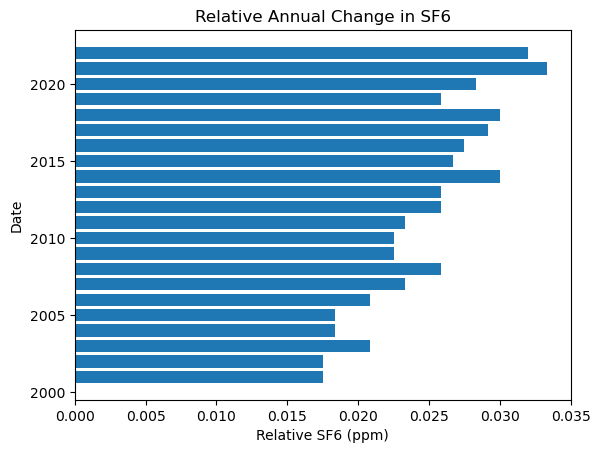

In [30]:
fig, ax = plt.subplots()

ax.barh(width = df_year["relative_sf6"]["mean"], y = df_year.index)

ax.set_xlabel("Relative SF6 (ppm)")

ax.set_ylabel("Date")

ax.set_title("Relative Annual Change in SF6")

plt.show();

-------------

### A function for Bar Graph

In [31]:
def bar_graph(x, y, figsize= (10,4), x_label = "", y_label ="", title="",title_size = 20, label_size=15, 
              color = "black", grid = False, legend = False, vertical = True):
    
    """
    grid : bool. if true, plot grid
    legend : bool. if true, pt legend
    vertical: bool. if True plot bars as vertical, if false plot as horizontal
    """
    
    plt.style.use('default')
    
    plt.figure(figsize = figsize)
    

    if vertical:

        plt.bar(x, y, color = color, label = y.name)
        
    else:

        plt.barh(x , y, color = color, label = y.name)
        
    plt.xlabel(x_label, size= label_size)

    plt.ylabel(y_label, size = label_size)

    plt.title(title, size = title_size)
    
    if legend:
    
        plt.legend()
    
    if grid:
        
        plt.grid()

    plt.show()

---------------

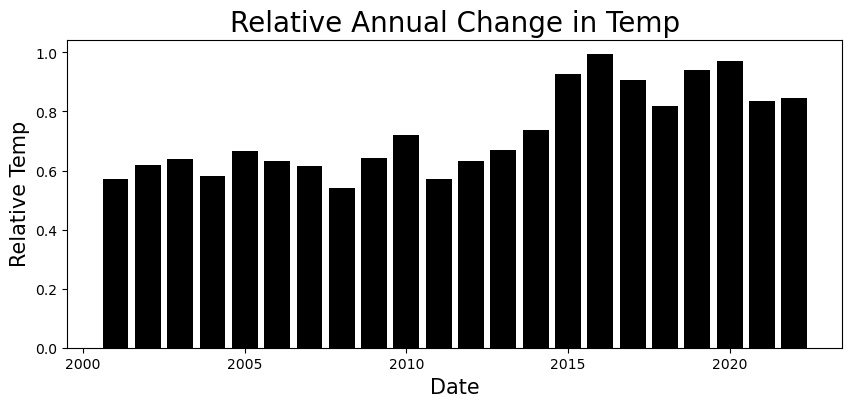

In [32]:
bar_graph(df_year.index, df_year["relative_temp"]["mean"], x_label = "Date", y_label = "Relative Temp", title = "Relative Annual Change in Temp")

--------------------

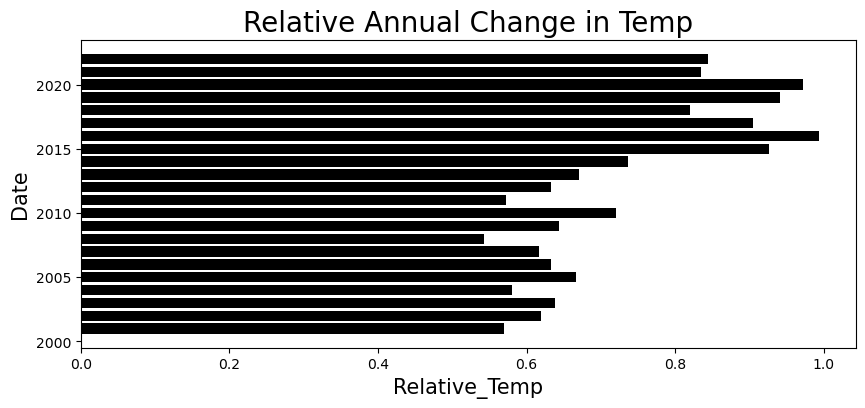

In [33]:
bar_graph(df_year.index, df_year["relative_temp"]["mean"], x_label = "Relative_Temp", y_label = "Date", title = "Relative Annual Change in Temp", vertical = False)

-------------

### Multi Bar Graphs

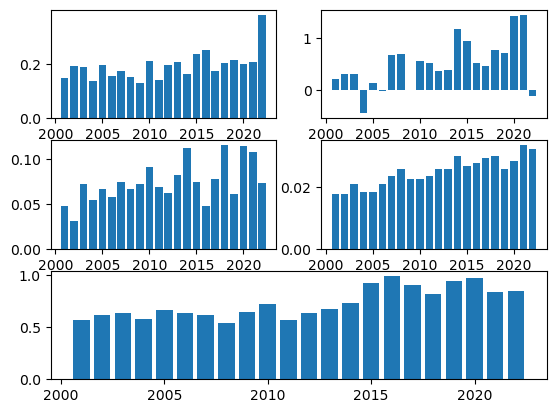

In [34]:
fig, ax = plt.subplots(3,2)

# first four relative graph with their location

ax[0,0].bar(df_year.index, df_year["relative_co2"]["mean"])
ax[0,1].bar(df_year.index, df_year["relative_ch4"]["mean"])
ax[1,0].bar(df_year.index, df_year["relative_n2o"]["mean"])
ax[1,1].bar(df_year.index, df_year["relative_sf6"]["mean"])

# last graph create 3x1 grid,  put last graph  to 3.row 

ax = plt.subplot(313)

ax.bar(df_year.index, df_year["relative_temp"]["mean"])

plt.show();

-------------

### Values in a row

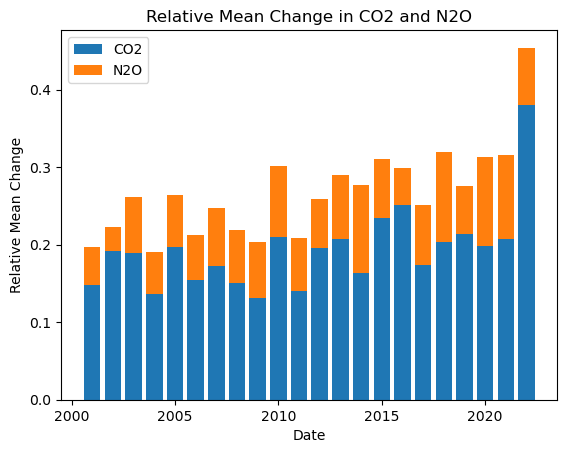

In [35]:
fig, ax = plt.subplots()

ax.bar(df_year.index, df_year["relative_co2"]["mean"], label = "CO2")

# "bottom" for location of variable at the bottom.
ax.bar(df_year.index, df_year["relative_n2o"]["mean"], bottom = df_year["relative_co2"]["mean"], label = "N2O")

plt.title("Relative Mean Change in CO2 and N2O")

plt.xlabel("Date")

plt.ylabel("Relative Mean Change")

plt.legend()

plt.show();

--------------

### 3 variables with alpha (transparency)

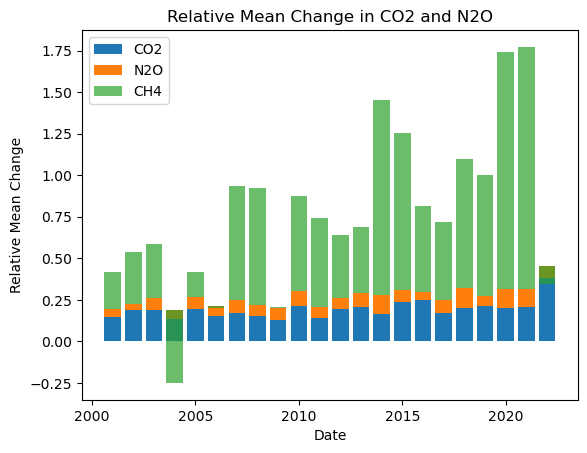

In [36]:
fig, ax = plt.subplots()

# "label" for legend
ax.bar(df_year.index, df_year["relative_co2"]["mean"], label = "CO2")

# "bottom" for arrangment of graph locations
ax.bar(df_year.index, df_year["relative_n2o"]["mean"], bottom = df_year["relative_co2"]["mean"], label = "N2O")

# "aplha" for transparency 
ax.bar(df_year.index, df_year["relative_ch4"]["mean"], bottom = df_year["relative_co2"]["mean"]+df_year["relative_n2o"]["mean"] , 
       label = "CH4", alpha=0.7)

plt.title("Relative Mean Change in CO2 and N2O")

plt.xlabel("Date")

plt.ylabel("Relative Mean Change")

plt.legend()

plt.show();

-------------

### intertwined bars 

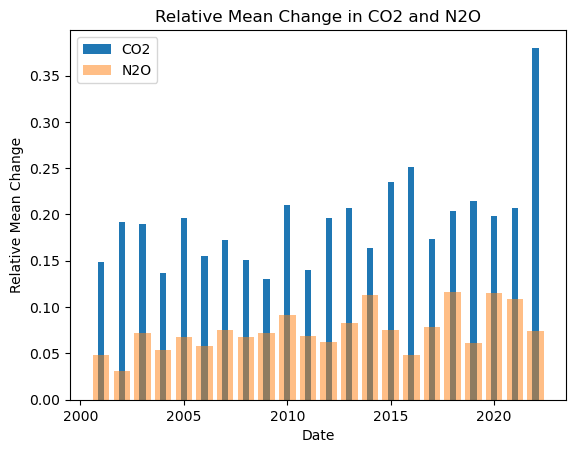

In [37]:
fig, ax = plt.subplots()

ax.bar(df_year.index, df_year["relative_co2"]["mean"], label = "CO2", width = 0.3)

ax.bar(df_year.index, df_year["relative_n2o"]["mean"], label = "N2O", alpha = 0.5)

plt.title("Relative Mean Change in CO2 and N2O")

plt.xlabel("Date")

plt.ylabel("Relative Mean Change")

plt.legend()

plt.show();

----------

### 3 interwined bars 

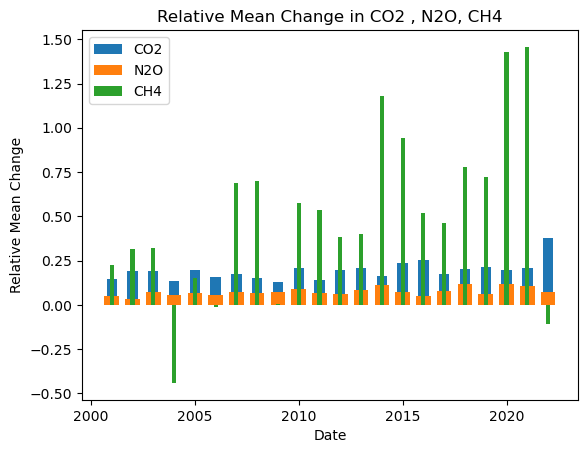

In [38]:
fig, ax = plt.subplots()
ax.bar(df_year.index, df_year["relative_co2"]["mean"], label = "CO2", width = 0.5)

# "bottom" for arrangment of graph locations
ax.bar(df_year.index, df_year["relative_n2o"]["mean"], label = "N2O", width = 0.7)

# "bottom" for arrangment of graph locations
ax.bar(df_year.index, df_year["relative_ch4"]["mean"], label = "CH4", width = 0.2)

plt.title("Relative Mean Change in CO2 , N2O, CH4")

plt.xlabel("Date")

plt.ylabel("Relative Mean Change")

plt.legend()

plt.show();

--------------

## Bars side by side

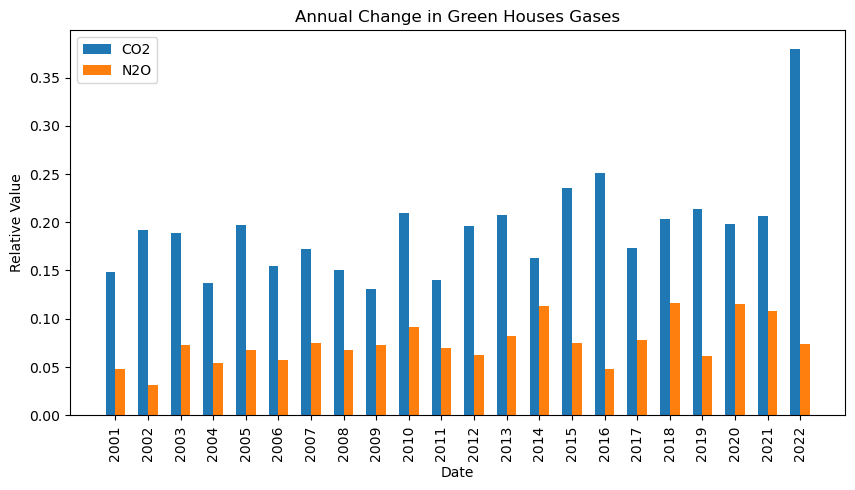

In [39]:
plt.figure(figsize=[10, 5])

# "witdh" for each bars width 
# "aligh" for bars location, "center" , "edge".
# one bar chart's width = 1, sum of the widths of the adjacent bars must not exceed 1.

plt.bar(df_year.index, df_year["relative_co2"]["mean"], align="edge", width=0.3)
plt.bar(df_year.index+0.3, df_year["relative_n2o"]["mean"],align="edge",width=0.3)

# x tick placements, it is located according to second bars distance 
plt.xticks([i + 0.3 for i in df_year.index], df_year.index, rotation = 90)

plt.xlabel("Date")

plt.ylabel("Relative Value")

plt.title("Annual Change in Green Houses Gases")

plt.legend(["CO2","N2O","CH4"])

plt.show()

--------------

### 3 bars side by side

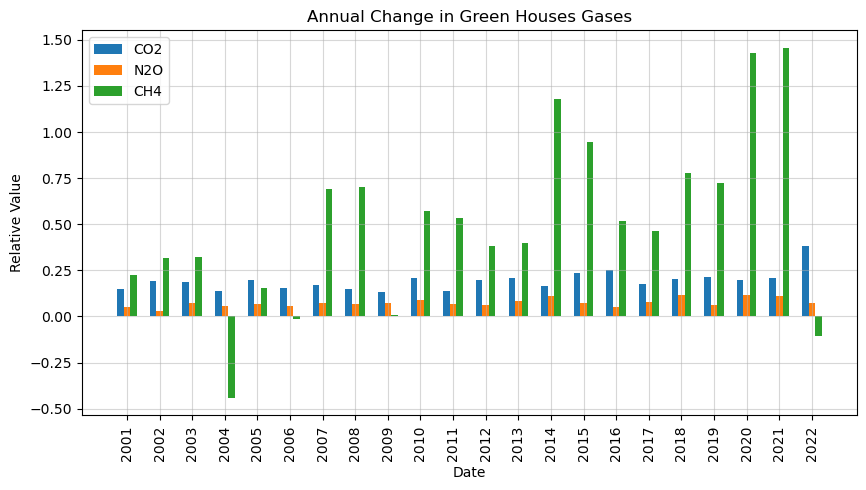

In [40]:
plt.figure(figsize=[10, 5])


plt.bar(df_year.index, df_year["relative_co2"]["mean"], align="edge", width=0.2)
plt.bar(df_year.index+0.2, df_year["relative_n2o"]["mean"],align="edge",width=0.2)
plt.bar(df_year.index+0.4, df_year["relative_ch4"]["mean"],align="edge",width=0.2)

plt.xticks([i + 0.3 for i in df_year.index], df_year.index, rotation = 90)

plt.xlabel("Date")

plt.ylabel("Relative Value")

plt.title("Annual Change in Green Houses Gases")

plt.grid(alpha = 0.5)

plt.legend(["CO2","N2O","CH4"])

plt.show()

-----------

### Bars with their names in xlabel

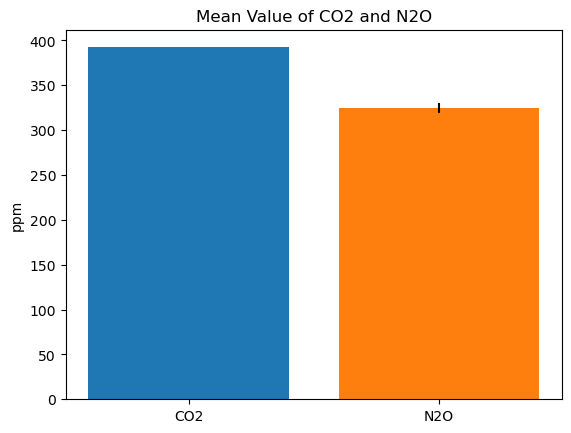

In [41]:
fig, ax = plt.subplots()

ax.bar("CO2", df["co2"].mean())

# "yerr" for std error 
ax.bar("N2O", df["n2o"].mean(), yerr = df["n2o"].std() )

ax.set_ylabel("ppm")

plt.title("Mean Value of CO2 and N2O")

plt.show();

---------------

# 3 - Errorbar

------------------------

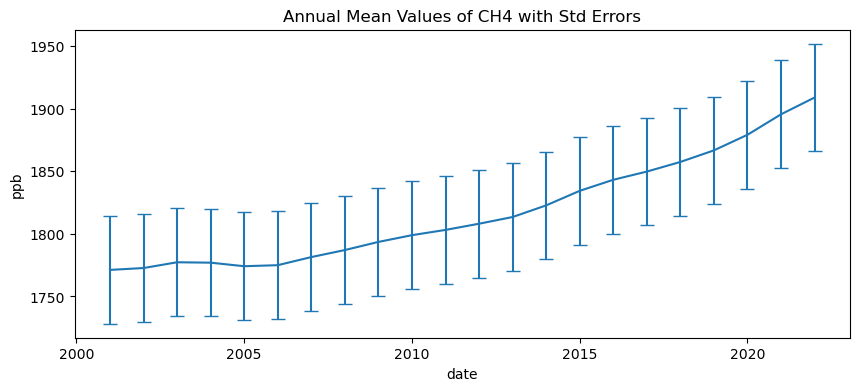

In [42]:
fig, ax = plt.subplots(figsize =(10,4))

# "capsize" for the size of the sticks loacted at beginning and end of the error bars
ax.errorbar(df_year.index, df_year["ch4"]["mean"], yerr = df_year["ch4"]["mean"].std(), capsize=5)

ax.set_xlabel("date")

ax.set_ylabel("ppb")

ax.set_title("Annual Mean Values of CH4 with Std Errors") 

plt.show()

-------------

# 4 - Histogram

----------------

### Examples

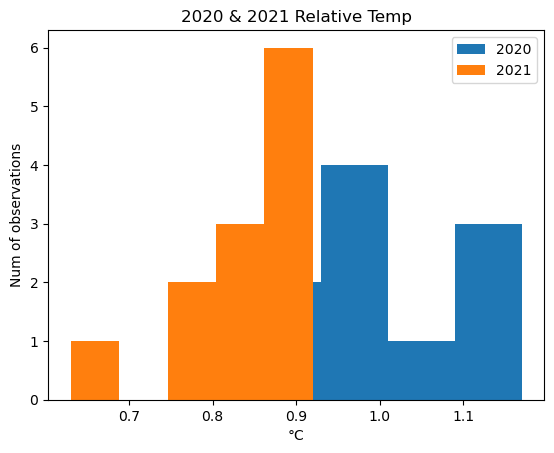

In [43]:
fig, ax = plt.subplots()

ax.hist(df.loc["2020"]["relative_temp"], label = "2020", bins = 5)
ax.hist(df.loc["2021"]["relative_temp"], label = "2021", bins = 5)

ax.set_xlabel("°C")

ax.set_ylabel("Num of observations")

ax.set_title("2020 & 2021 Relative Temp")

ax.legend()

plt.show();

--------------

### different bins

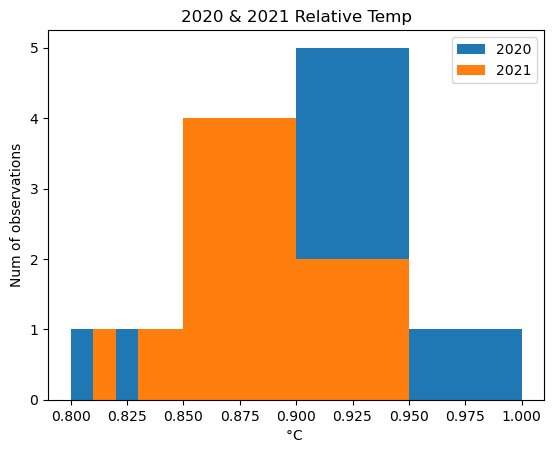

In [44]:
fig, ax = plt.subplots()

ax.hist(df.loc["2020"]["relative_temp"], label = "2020", bins = [0.8, 0.85, 0.9, 0.95, 1.0])
ax.hist(df.loc["2021"]["relative_temp"], label = "2021", bins = [0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.9, 0.95, 1.0])

ax.set_xlabel("°C ")

ax.set_ylabel("Num of observations")

ax.set_title("2020 & 2021 Relative Temp")

ax.legend()

plt.show();

----------------

#### Different type histograms

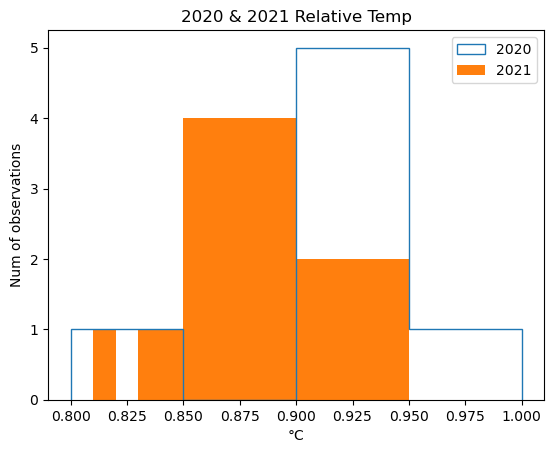

In [45]:
fig, ax = plt.subplots()

ax.hist(df.loc["2020"]["relative_temp"], label = "2020", bins = [0.8, 0.85, 0.9, 0.95, 1.0], histtype = "step")
ax.hist(df.loc["2021"]["relative_temp"], label = "2021", bins = [0.8, 0.81, 0.82, 0.83, 0.84, 0.85, 0.9, 0.95, 1.0])

ax.set_xlabel("°C")

ax.set_ylabel("Num of observations")

ax.set_title("2020 & 2021 Relative Temp")

ax.legend()

plt.show();

-----------------------

# 5 - Box plot

---------------------

### With notch

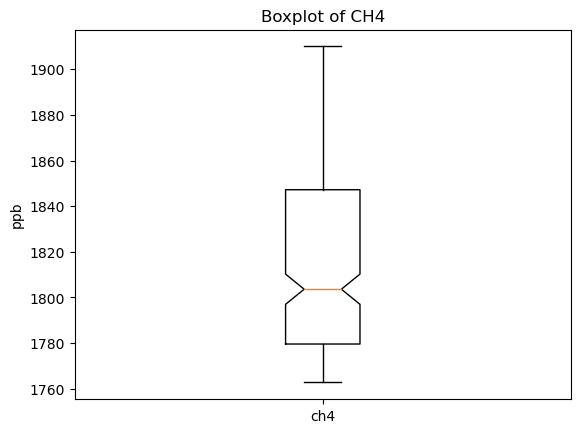

In [46]:
fig, ax = plt.subplots()

ax.boxplot( df.ch4, notch=True)

ax.set_xticklabels(["ch4"])

ax.set_ylabel("ppb")

ax.set_title("Boxplot of CH4")

plt.show()

------------------

### 2 boxplots 

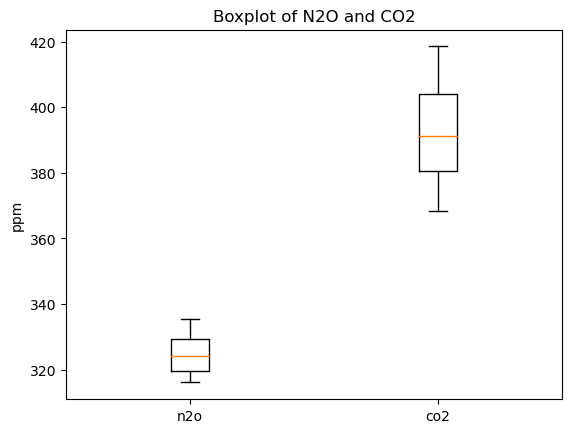

In [47]:
fig, ax = plt.subplots()

ax.boxplot( [df.n2o, df.co2])

ax.set_xticklabels(["n2o","co2"])

ax.set_ylabel("ppm")

ax.set_title("Boxplot of N2O and CO2")

plt.show()

-------------

# 6 - Scatterplot

--------------------

### Example

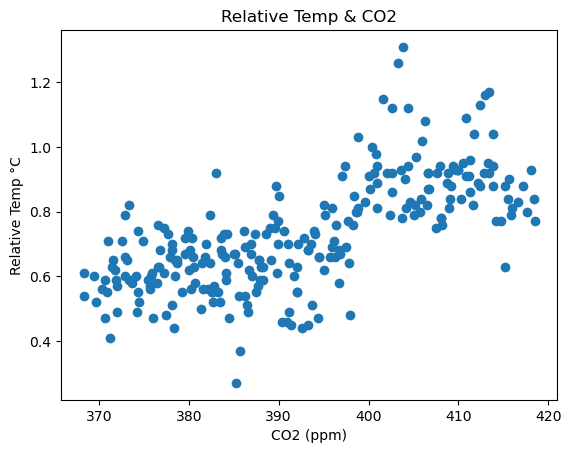

In [48]:
fig, ax = plt.subplots()

# x, y
ax.scatter(df["co2"], df["relative_temp"])

ax.set_xlabel("CO2 (ppm)")

ax.set_ylabel("Relative Temp °C")

ax.set_title( "Relative Temp & CO2")

plt.show()

--------------

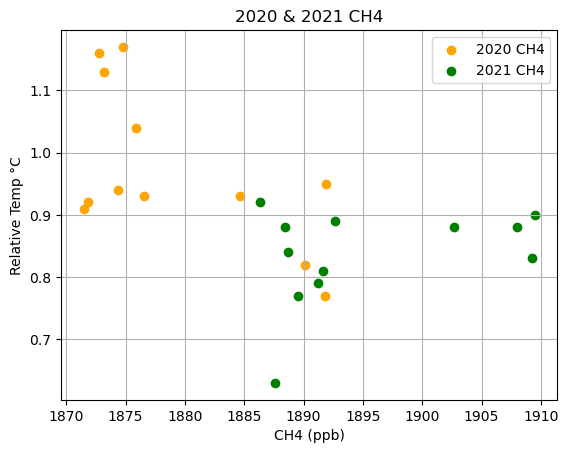

In [49]:
# to compare different dates measurements of CH4 
fig, ax = plt.subplots()

ax.scatter(df.loc["2020"]["ch4"], df.loc["2020"]["relative_temp"], color = "orange", label = "2020 CH4")
ax.scatter(df.loc["2021"]["ch4"], df.loc["2021"]["relative_temp"], color = "green", label = "2021 CH4")

ax.set_xlabel("CH4 (ppb)")

ax.set_ylabel("Relative Temp °C")

ax.set_title( "2020 & 2021 CH4")

ax.legend()

ax.grid()

plt.show()

---------------

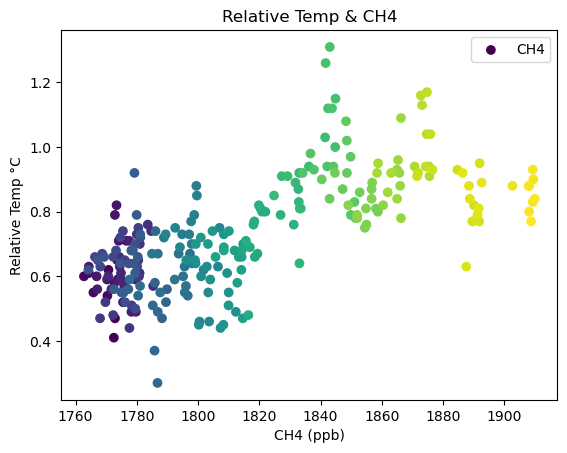

In [50]:
fig, ax = plt.subplots()

# "c" for  color 
ax.scatter(df["ch4"], df["relative_temp"], c = df.index, label = "CH4")

ax.set_xlabel("CH4 (ppb)")

ax.set_ylabel("Relative Temp °C")

ax.set_title( "Relative Temp & CH4")

ax.legend()

plt.show()